In [1]:
%load_ext autoreload
%autoreload 1
%aimport modules.dataset_auxiliary, modules.classification_auxiliary, modules.ml_auxiliary, modules.bullets, modules.models_module

/home/s.gostilovich/gesture_progect/gesture_classification/env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import torch 
import tensorly as tl
from tensorly import random
import os
import pickle
# import modules.dataset_auxiliary as daux
# from modules.dataset_auxiliary import *
# from modules.classification_auxiliary import *
# from modules.ml_auxiliary import *
from modules.bullets import*
from modules.classification_auxiliary import *
from modules.ml_auxiliary import *
from modules.models_module import *
import copy

from abc import ABC, abstractmethod
import time
import json
import timeit

from tqdm import tqdm



from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from IPython.display import clear_output

import xgboost as xgb
import pystmm

In [37]:
import datetime
date_time = datetime.datetime.now()
format_str = '%y.%m.%d-%H:%M:%S'

script_name = ""
print(f"Start: {script_name} at {date_time.strftime(format_str)}")

Start:  at 22.09.08-16:45:46


In [38]:
date_time_end = datetime.datetime.now()
delta_t = 

In [43]:
f"{(date_time_end - date_time).total_seconds():.3f}"

'8.125'

In [47]:

# tucker_decompose for folder
out_file = 'out.txt'
str_ = "nohup python3 -u ../bullets/tucker_decompose.py -s data/skgest-mpipe-center-folds/fold-P{0:02d}.npz"\
    " -d data/skgest-mpipe-center-folds_tucker_full/fold-P{1:02d}_tucker_full.pkl &"
    
str_ = "python3 -u ../bullets/tucker_decompose.py -s data/skgest-{skeleton}-center-folds/fold-P{0:02d}.npz"\
    " -d data/skgest-{skeleton}-center-folds_tucker_full/fold-P{1:02d}_tucker_full.pkl"


f = None
with open(out_file, 'w') as f:
    for skeleton in ['mpipe', 'ntu', 'smpl']:
        print(file=f)
        for i in range(1, 22):
                print(str_.format(i, i, skeleton=skeleton), file=f)

In [44]:
# svd_decompose for folder
out_file = 'out.txt'
str_ = "nohup python3 -u ../bullets/svd_decompose.py -s data/skgest-mpipe-center-folds/fold-P{0:02d}.npz"\
    " -d data/skgest-mpipe-center-folds_SVD_max/fold-P{1:02d}_SVD_max.pkl &"
    
str_ = "python3 -u ../bullets/svd_decompose.py -s data/skgest-{skeleton}-center-folds/fold-P{0:02d}.npz"\
    " -d data/skgest-{skeleton}-center-folds_SVD_max/fold-P{1:02d}_SVD_max.pkl"

with open(out_file, 'w') as f:
    for skeleton in ['mpipe', 'ntu', 'smpl']:
        print(file=f)
        for i in range(1, 22):
                print(str_.format(i, i, skeleton=skeleton), file=f)
                
                
                

In [3]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [28]:
mod = LogisticRegression()

In [22]:
os.listdir('stages/data/skgest-mpipe-center-folds/')

['fold-P01.npz',
 'fold-P02.npz',
 'fold-P03.npz',
 'fold-P04.npz',
 'fold-P05.npz',
 'fold-P06.npz',
 'fold-P07.npz',
 'fold-P08.npz',
 'fold-P09.npz',
 'fold-P10.npz',
 'fold-P11.npz',
 'fold-P12.npz',
 'fold-P13.npz',
 'fold-P14.npz',
 'fold-P15.npz',
 'fold-P16.npz',
 'fold-P17.npz',
 'fold-P18.npz',
 'fold-P19.npz',
 'fold-P20.npz',
 'fold-P21.npz']

In [13]:
import pickle
import pathlib

In [8]:
with open("./stages/results_cv/model1-skgest-mpipe-center-folds.pkl", 'rb') as f:
    a = pickle.load(f)
    


In [ ]:
os.rename('a.txt', 'b.kml')

In [35]:
ls

aaa.txt   gestures.txt         requirements.txt   tensors_my.ipynb
backup/   model_results.ipynb  script_work.ipynb
bullets/  modules/             stages/
env/      out.txt              tensors.ipynb


In [45]:
src_ = "./stages/results_cv/model{n}-tucker-skgest-smpl-center-folds{ext}"

for n in [1,2,3,4,5,6]:
    for ext in ['.json', '.pkl']:
        
        path = src_.format(n=n, ext=ext)
        path = pathlib.Path(path)
        
        if not path.exists():
            print(f'Warning! "{path}" does not exist!')
            continue
        
        
        name = path.stem
        # print(path)
        transform = name.split('-')[1]
        if transform == 'svd':
            transform = '_SVD_max'
        elif transform == 'origin':
            transform = ''
        elif transform == 'tucker':
            transform = '_tucker_full'
        else:
            print(f"Warning!! For {name} and {path} continue")
            continue
        
        new_name = "-".join(name.split('-')[0:1] + name.split('-')[2:]) + transform
        
        new_name += path.suffix
        new_path = pathlib.Path(os.path.join(str(path.parent), new_name))
        
        if new_path.exists():
            print(f'Warning! "{new_path}" exists!')
            continue
        else:
            os.rename(path, new_path)
            


Warning! "stages/results_cv/model1-tucker-skgest-smpl-center-folds.json" does not exist!
Warning! "stages/results_cv/model1-tucker-skgest-smpl-center-folds.pkl" does not exist!
Warning! "stages/results_cv/model2-tucker-skgest-smpl-center-folds.json" does not exist!
Warning! "stages/results_cv/model2-tucker-skgest-smpl-center-folds.pkl" does not exist!
Warning! "stages/results_cv/model3-tucker-skgest-smpl-center-folds.json" does not exist!
Warning! "stages/results_cv/model3-tucker-skgest-smpl-center-folds.pkl" does not exist!
Warning! "stages/results_cv/model4-tucker-skgest-smpl-center-folds.json" does not exist!
Warning! "stages/results_cv/model4-tucker-skgest-smpl-center-folds.pkl" does not exist!
Warning! "stages/results_cv/model5-tucker-skgest-smpl-center-folds.json" does not exist!
Warning! "stages/results_cv/model5-tucker-skgest-smpl-center-folds.pkl" does not exist!
Warning! "stages/results_cv/model6-tucker-skgest-smpl-center-folds.json" does not exist!
Warning! "stages/results_c

In [30]:
pathlib.Path().exists()

True

In [21]:
files = [f"cv_work-{data_type}-{skeleton}.sh" for data_type in ['origin', 'svd', 'tucker'] for skeleton in ['mpipe', 'ntu', 'smpl'] ]


for file in files:
    with open(os.path.join('stages/bash_scripts', file), 'w') as f:
        print('#!/bin/bash\n', file=f)

In [ ]:
dirs = [f"results_cv-{data_type}-{skeleton}.sh" for data_type in ['origin', 'svd', 'tucker'] for skeleton in ['mpipe', 'ntu', 'smpl'] ]


for file in files:
    with open(os.path.join('stages/bash_scripts', file), 'w') as f:
        print('#!/bin/bash\n', file=f)

In [304]:
with open('/home/s.gostilovich/gesture_progect/gesture_classification/stages/models/model1.json', 'r') as f:
    a = json.load(f)
print(a)

{'model_type': 'LogReg', 'params': {}}


In [53]:
timeit.timeit('mod.get_params()', number=100000, globals=globals())

7.745169984991662

In [3]:
model = KNN()

In [5]:
model.fit(data['x_test'], data['y_test'])

Model KNN is fitting...
0.03867316246032715 s passed


In [6]:
preds = model.predict(data['x_test'])

In [13]:
classes = get_classes_dict()

In [14]:
classes

{0: 'G01_left_handyes',
 1: 'G02_right_handyes',
 2: 'G03_left_handno',
 3: 'G04_right_handno',
 4: 'G05_left_select',
 5: 'G06_right_select',
 6: 'G07_left_call',
 7: 'G08_right_call',
 8: 'G09_left_mute',
 9: 'G10_right_mute',
 10: 'G11_left_unmute',
 11: 'G12_right_unmute',
 12: 'G13_left_close',
 13: 'G14_right_close',
 14: 'G15_left_wave',
 15: 'G16_right_wave',
 16: 'G17_left_write',
 17: 'G18_right_write',
 18: 'G19_headyes',
 19: 'G20_headno',
 20: 'G21_left_roll',
 21: 'G22_right_roll',
 22: 'G23_left_yaw',
 23: 'G24_right_yaw',
 24: 'G25_left_save',
 25: 'G26_right_save',
 26: 'G27_left_export',
 27: 'G28_right_export',
 28: 'G29_left_pupil',
 29: 'G30_right_pupil',
 30: 'G31_left_swipeup',
 31: 'G32_right_swipeup',
 32: 'G33_left_swipedown',
 33: 'G34_right_swipedown',
 34: 'G35_left_swipeleft',
 35: 'G36_right_swipeleft',
 36: 'G37_left_swiperight',
 37: 'G38_right_swiperight',
 38: 'G39_left_high',
 39: 'G40_right_high',
 40: 'G41_moveforward',
 41: 'G42_movebackward',
 42

In [7]:
from modules.bullets import *

In [12]:
len(_get_gesture_txt_list_())

54

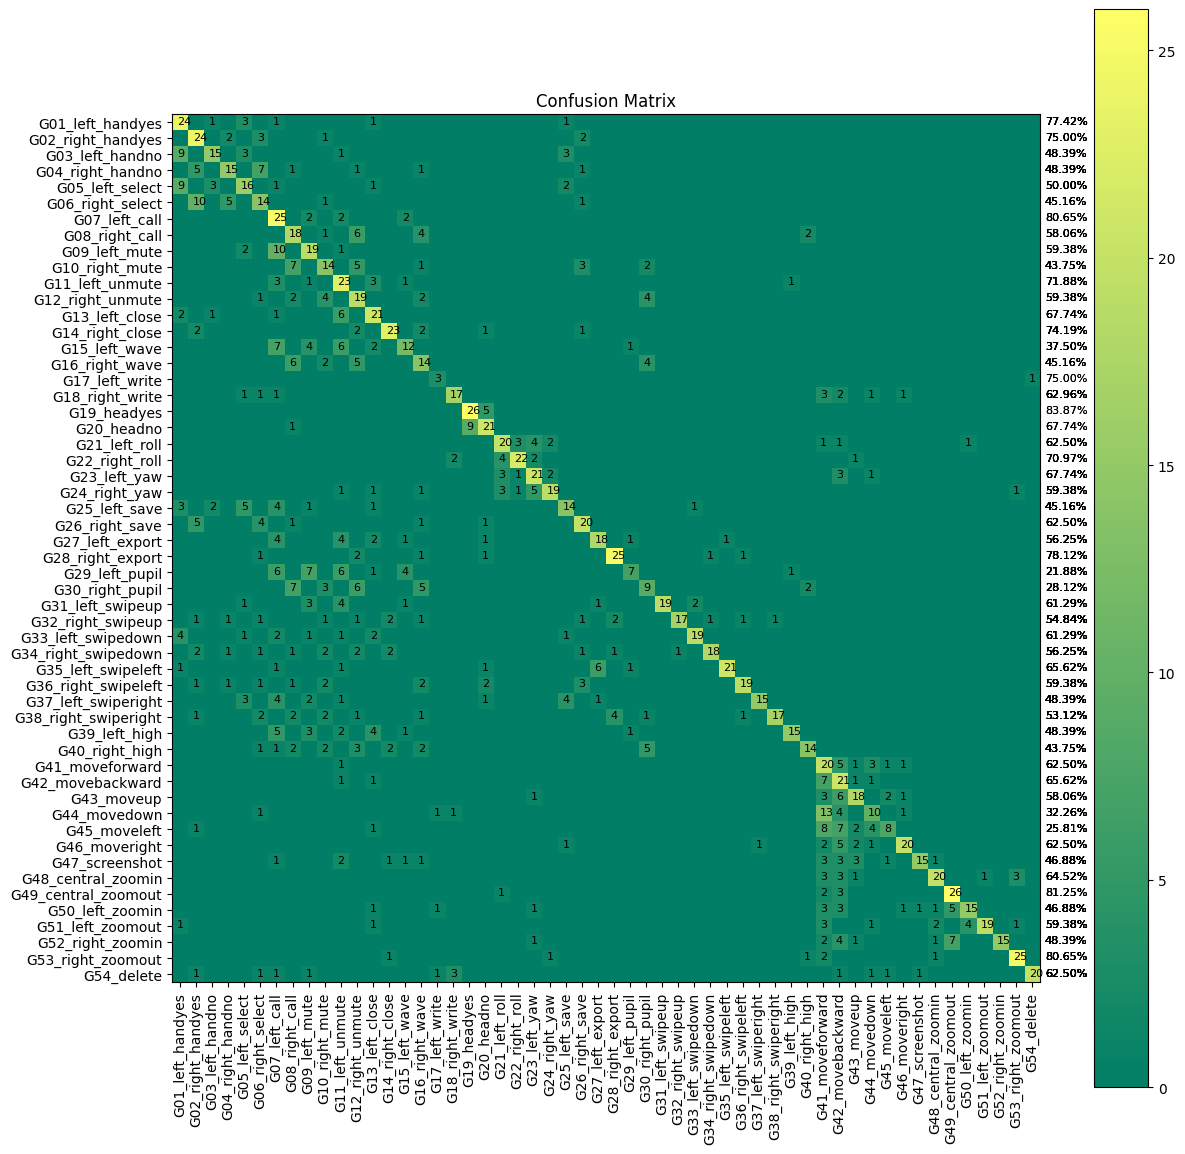

In [12]:
plot_confusion_matrix(data['y_test'], preds,  classes)
plt.savefig('fig.jpg', dpi=300, )
print()

In [247]:
a = os.path.pardir(input_path)
a[1]

TypeError: 'str' object is not callable

In [248]:
a = os.path.splitext(input_path)
a[1]

'.npz'

In [306]:
a = pathlib.Path(input_path)

In [307]:
a.name


'skgest-mpipe-center.npz'

In [250]:
os.path.splitext(a[0])

('/mnt/volume-1/04.skgest-bench/input/skgest-mpipe-center', '')

In [4]:
input_path = "/mnt/volume-1/04.skgest-bench/input/skgest-mpipe-center.npz"
data = load_data(input_path)

For x_train nan will be replaced by 0!
For x_test nan will be replaced by 0!


In [42]:
from genericpath import isfile
import pathlib


def get_target_files(src, suffix='.json'):
    src = pathlib.Path(src)
    src_list = []
    if src.is_file():
        src_list += [str(src)]
    
    if src.is_dir():
        for src_file in os.listdir(src):
            if pathlib.Path(src_file).suffix == suffix:
                src_list += [str(src_file)]
    return src_list
            
        
        
    

In [ ]:
def form_table(src_list, dst=None):
    
    pass

In [44]:

get_target_files(results_path)

['model1-skgest-mpipe-center_tucker_full.json',
 'model2-skgest-mpipe-center_tucker_full.json',
 'model2-skgest-mpipe-center.json',
 'model3-skgest-mpipe-center_tucker_full.json',
 'model3-skgest-mpipe-center.json',
 'model4-skgest-mpipe-center_tucker_full.json',
 'model5-skgest-mpipe-center_tucker_full.json',
 'model6-skgest-mpipe-center_SVD_max.json',
 'model6-skgest-mpipe-center_tucker_full.json',
 'model6-skgest-mpipe-center.json',
 'model2-skgest-mpipe-center_SVD_max.json']

In [38]:
results_path = 'stages/results/'
results_path = pathlib.Path(results_path)
os.listdir(results_path)[0]



'model1-skgest-mpipe-center_tucker_full.json'

In [19]:
np_tensor_1[:].shape

(1670, 27000)

In [10]:
np_tensor_1 = np_tensor.reshape([1670, -1])

In [66]:
data_tensor, data_tensor_test = data['x_train'], data['x_test']
y_train, y_test = data['y_train'], data['y_test']


In [46]:
model = LogisticRegression()


In [45]:
model = LogReg(max_iter=1)

NameError: name 'LogReg' is not defined

In [153]:
model.main_dict

{'name': 'LogReg',
 'do_scaler': True,
 'n_trials': 10,
 'params': {'max_iter': 1}}

In [143]:
time.time()

1662466131.6106195

In [186]:
data_tensor_test[0:1,:,:].shape

(1, 120, 225)

In [181]:
model = LogReg(max_iter=1)
print(model.name)
print(model.main_dict)
print()
model.fit(data_tensor, y_train)
preds = model.predict(data_tensor_test)
print(accuracy_score(y_test, preds))
print()
model.eval_inference_time(data_tensor_test, 1000)
print()
accs = model.eval_model(data_tensor, y_train, data_tensor_test, y_test)
print(accs)


Model LogReg is fitting...


/home/s.gostilovich/gesture_progect/gesture_classification/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3.295163154602051 s passed
Inference time evaluation for mocel LogReg... n_timeit=1000


KeyboardInterrupt: 

In [216]:
def check_model_for_working(model, data_tensor, data_tensor_test, y_train, y_test, n_timeit=1000):
    print(model.name)
    print(model.main_dict)
    print()
    model.fit(data_tensor, y_train)
    preds = model.predict(data_tensor_test)
    print(accuracy_score(y_test, preds))
    print()
    model.eval_inference_time(data_tensor_test[0:1,:,:], n_timeit)
    print()
    accs = model.eval_model(data_tensor, y_train, data_tensor_test, y_test)
    print(accs)
    

In [218]:
model = XGBoost(n_estimators=1,)
model.fit(data_tensor, y_train)
preds = model.predict(data_tensor_test)
print(accuracy_score(y_test, preds))

Model XGBoost is fitting...
9.7624831199646 s passed
0.7029940119760479


In [220]:
model.eval_inference_time(data_tensor_test[0:1,:,:], 1000)

Inference time evaluation for mocel XGBoost... n_timeit=1000
Inference time for nodel XGBoost: 38.416 ms


0.038415600760024975

In [209]:
check_model_for_working(SVMClassifier(n_estimators=1,), data_tensor[:,:,:], data_tensor[:,:,:], y_train[:], y_train[:], n_timeit=1000)

XGBoost
{'name': 'XGBoost', 'do_scaler': False, 'n_trials': 10, 'params': {'n_estimators': 1}}

Model XGBoost is fitting...
11.604217767715454 s passed
0.8911424903722721

Inference time evaluation for mocel XGBoost... n_timeit=1000
Inference time for nodel XGBoost: 41.286 ms

Modle XGBoost is evaluating... n_trials=10


100%|██████████| 10/10 [01:39<00:00,  9.92s/it]

Mean acc: 89.11(0.00)%
Mean fitting times:9.846737575531005
[0.89114249 0.89114249 0.89114249 0.89114249 0.89114249 0.89114249
 0.89114249 0.89114249 0.89114249 0.89114249]


In [ ]:
model = KNN

In [243]:
check_model_for_working(STMM(), data_tensor[:10,:,:], data_tensor[:10,:,:], y_train[:10], y_train[:10], n_timeit=10)

maxIter  2
ovr 1.0 1.0 2 0.01 l2 True 0.01 squared_hinge 100000
STMM
{'name': 'STMM', 'do_scaler': False, 'n_trials': 3, 'params': {}}

STM reshape
Model STMM is fitting...
1 / 2
2 / 2
1 / 2
2 / 2
1 / 2
2 / 2
1 / 2
2 / 2
1 / 2
2 / 2
1 / 2
2 / 2
1 / 2
2 / 2
1 / 2
2 / 2
1 / 2
2 / 2
0.3530268669128418 s passed
STM reshape
1.0

Inference time evaluation for mocel STMM... n_timeit=10
STM reshape
Inference time for nodel STMM: 1.064 ms

STM reshape
STM reshape
Modle STMM is evaluating... n_trials=3


  0%|          | 0/3 [00:00<?, ?it/s]

STM reshape
1 / 2
2 / 2
1 / 2
2 / 2
1 / 2
2 / 2
1 / 2
2 / 2
1 / 2
2 / 2
1 / 2
2 / 2
1 / 2
2 / 2
1 / 2


 33%|███▎      | 1/3 [00:00<00:00,  3.74it/s]

2 / 2
1 / 2
2 / 2
STM reshape
1 / 2
2 / 2
1 / 2
2 / 2
1 / 2
2 / 2
1 / 2
2 / 2
1 / 2
2 / 2
1 / 2
2 / 2
1 / 2


 67%|██████▋   | 2/3 [00:00<00:00,  3.73it/s]

2 / 2
1 / 2
2 / 2
1 / 2
2 / 2
STM reshape
1 / 2
2 / 2
1 / 2
2 / 2
1 / 2
2 / 2
1 / 2
2 / 2
1 / 2
2 / 2
1 / 2
2 / 2
1 / 2


100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

2 / 2
1 / 2
2 / 2
1 / 2
2 / 2
Mean acc: 100.00(0.00)%
Mean fitting times:0.2322258154551188
[1. 1. 1.]


In [188]:
model.eval_inference_time(data_tensor_test[0:1,:,:], 100000)

Inference time evaluation for mocel LogReg... n_timeit=100000
Inference time for nodel LogReg: 0.389 ms


0.0003890264711994678

In [187]:
0.22686021178029478 / data_tensor_test.shape[0]

0.00013584443819179327

In [178]:
preds = model.predict(data_tensor_test)

In [146]:
accuracy_score(y_test, preds)

0.5095808383233533

In [190]:
accs

array([0.50958084, 0.50958084, 0.50958084, 0.50958084, 0.50958084])

In [189]:
accs = model.eval_model(data_tensor, y_train, data_tensor_test, y_test, n_trials=5)

Modle LogReg is evaluating... n_trials=5


  0%|          | 0/5 [00:00<?, ?it/s]/home/s.gostilovich/gesture_progect/gesture_classification/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 20%|██        | 1/5 [00:04<00:18,  4.56s/it]/home/s.gostilovich/gesture_progect/gesture_classification/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

Mean acc: 50.96(0.00)%
Mean fitting times:3.3809622287750245


In [272]:
print(LogReg)

<class '__main__.LogReg'>


In [297]:
model = create_model({'model_type': 'LogReg'})

<class '__main__.LogReg'>
LogReg: {} was created


In [298]:
print(model)

LogReg: {}


In [278]:
ModelAbstract.PARAMS_KEY

'params'

ModelAbstract()

In [296]:

def create_model(init_model_dict):
    model_type_str = init_model_dict['model_type']
    
    model_type = None
    model_type = eval(model_type_str)
    
    print(model_type)
    PARAMS_KEY = ModelAbstract.PARAMS_KEY
    if PARAMS_KEY not in init_model_dict.keys():
        init_model_dict[PARAMS_KEY] = {}
        
    model = model_type(**init_model_dict[PARAMS_KEY])
    print(model, 'was created')
    return model

class ModelAbstract(ABC):
    NAME_KEY = 'name'
    DO_SCALER_KEY = 'do_scaler'
    N_TRIALS_KEY = 'n_trials'
    PARAMS_KEY = 'params'
    ALL_PARAMS_KEY = 'all_params'
    
    def __init__(self, src=None, **kwargs):
        self.main_dict = {self.NAME_KEY: None,
                          self.DO_SCALER_KEY: False,
                          self.N_TRIALS_KEY: 1,
                          self.PARAMS_KEY: {},}
        if src is not None:
            self.load_model_dict(src)
            
        for key in kwargs.keys():
            self.main_dict[self.PARAMS_KEY][key] = kwargs[key]
            
        self.model = self.init_model()  # with updating self.main_dict
        
        self.params = self.main_dict[self.PARAMS_KEY]
        self.all_params = self.model.get_params()
        
        self.do_scaler = self.main_dict[self.DO_SCALER_KEY]
        self.name = self.main_dict[self.NAME_KEY]
        self.n_trials = self.main_dict[self.N_TRIALS_KEY]
        self.scaler = None
        
        self.fit_time=None
        
    def __str__(self) -> str:
        return self.name + ": " + str(self.params)
      
             
    # init methods 
    @abstractmethod
    def init_model(self):
        pass
    
    @abstractmethod
    def gen_default_params(self):
        pass
    
    
    def reshape_X_tensor(self, X_tensor):
        if len(X_tensor.shape) > 2:
            X_tensor = X_tensor.reshape(X_tensor.shape[0], -1)  
        return X_tensor       
    
    def fit(self, X_train, y_train, verbose=1):
        
        X_train = self.reshape_X_tensor(X_train)
        
        if self.do_scaler:
            self.scaler = StandardScaler().fit(X_train)
            X_train = self.scaler.transform(X_train)
          
        if verbose > 0:  
            print(f"Model {self.name} is fitting...")
        t = time.time()
        self.model.fit(X_train, y_train)
        self.fit_time = (time.time() - t)
        if verbose > 0:
            print(f"{self.fit_time} s passed")
        return self
             
    def predict(self, X):
        X = self.reshape_X_tensor(X)
        
        if self.do_scaler:
            X = self.scaler.transform(X)
            
        pred = self.model.predict(X)
        return pred
           
    def eval_model(self, X_train, y_train, X_test, y_test, n_trials=None, metric_fun=accuracy_score, metric_name='acc', show_presentage=True):
        
        if n_trials is None:
            n_trials = self.n_trials
            
        X_train = self.reshape_X_tensor(X_train)
        X_test = self.reshape_X_tensor(X_test)
        
        if self.do_scaler:
            X_train = self.scaler.transform(X_train)
            X_test = self.scaler.transform(X_test)
        
        acc_array = []
        fit_times = []
        print(f"Modle {self.name} is evaluating... n_trials={n_trials}")
        for i in tqdm(range(n_trials)): 
            
            self.fit(X_train, y_train, verbose=0)
            fit_times += [self.fit_time]    
            pred = self.model.predict(X_test)
            acc = metric_fun(y_test, pred)
            acc_array += [acc]
        acc_array = np.array(acc_array)
        mean = acc_array.mean()
        std = acc_array.std(ddof=1)
        
        show_str= f"{mean:.4f}({std:.4f})"
        if show_presentage:
            show_str= f"{100*mean:.2f}({100*std:.2f})%"

        print(f"Mean {metric_name}: {show_str}" )
        print(f"Mean fitting times:{np.array(fit_times).mean()}" )
        return acc_array
        
        
        
    def eval_inference_time(self, X, n_timeit=100):
        
        print(f"Inference time evaluation for mocel {self.name}... n_timeit={n_timeit}")
        X= self.reshape_X_tensor(X)
        if self.do_scaler:
            X = self.scaler.transform(X)
            
        # model = self
        total_time = timeit.timeit('self.model.predict(X)', number=n_timeit, globals=locals())
        inference_time = total_time/n_timeit
        print(f"Inference time for nodel {self.name}: {1000*inference_time:.3f} ms")
        return inference_time
            
  
    def load_model_dict(self, src):
        with open(src, 'r') as f:
            main_dict = json.load(f)
        for key in main_dict.keys():
            self.main_dict[key] = main_dict[key]
        return main_dict



    
     
class LogReg(ModelAbstract):
    def gen_default_params(self):
        def_params = dict(n_jobs=-1)
        return def_params
        
    def init_model(self):
        self.main_dict[self.NAME_KEY] = 'LogReg'
        self.main_dict[self.DO_SCALER_KEY] = True
        self.main_dict[self.N_TRIALS_KEY] = 3
                
        params = self.gen_default_params()
        params_new = self.main_dict[self.PARAMS_KEY]
        for key in params_new.keys():
            params[key] = params_new[key]
        
        return LogisticRegression(**params)

  
class RandForest(ModelAbstract):
    def gen_default_params(self):
        def_params = dict(n_jobs=-1)
        return def_params
        
    def init_model(self):
        self.main_dict[self.NAME_KEY] = 'RandForest'
        self.main_dict[self.DO_SCALER_KEY] = False
        self.main_dict[self.N_TRIALS_KEY] = 10
                
        params = self.gen_default_params()
        params_new = self.main_dict[self.PARAMS_KEY]
        for key in params_new.keys():
            params[key] = params_new[key]
        
        return RandomForestClassifier(**params)
    
    
class XGBoost(ModelAbstract):
    def gen_default_params(self):
        def_params = dict(n_jobs=-1)
        return def_params
        
    def init_model(self):
        self.main_dict[self.NAME_KEY] = 'XGBoost'
        self.main_dict[self.DO_SCALER_KEY] = False
        self.main_dict[self.N_TRIALS_KEY] = 10
                
        params = self.gen_default_params()
        params_new = self.main_dict[self.PARAMS_KEY]
        for key in params_new.keys():
            params[key] = params_new[key]
        
        return xgb.XGBClassifier(**params)
  
    
class SVMClassifier(ModelAbstract):
    def gen_default_params(self):
        def_params = dict(kernel='linear')
        return def_params
        
    def init_model(self):
        self.main_dict[self.NAME_KEY] = 'SVMClassifier'
        self.main_dict[self.DO_SCALER_KEY] = True
        self.main_dict[self.N_TRIALS_KEY] = 10
                
        params = self.gen_default_params()
        params_new = self.main_dict[self.PARAMS_KEY]
        for key in params_new.keys():
            params[key] = params_new[key]
        
        return SVC(**params)
    
    
    
    
class STMM(ModelAbstract):
    def reshape_X_tensor(self, X_tensor):
        print('STM reshape')
        if len(X_tensor.shape) < 3:
            X_tensor = X_tensor.reshape(list(X_tensor.shape) + [-1]) 
        return X_tensor
    
    def gen_default_params(self):
        def_params = dict(maxIter=2, tolSTM=1e-2, tol=1e-2)
        return def_params
        
    def init_model(self):
        self.main_dict[self.NAME_KEY] = 'STMM'
        self.main_dict[self.DO_SCALER_KEY] = False
        self.main_dict[self.N_TRIALS_KEY] = 3
                
        params = self.gen_default_params()
        params_new = self.main_dict[self.PARAMS_KEY]
        for key in params_new.keys():
            params[key] = params_new[key]
        
        return pystmm.classifier.STMM(**params)
        
        
                

In [ ]:
modlel = 